In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df_treinamento = pd.read_csv('../arquivos_csv/treinamento4.csv', low_memory=False)
df_teste = pd.read_csv('../arquivos_csv/teste4.csv', low_memory=False)


#### Distância Manhattan

Melhor valor de k: 1
Acurácia com k = 1: 0.9959
Matriz de Confusão para o melhor k:
           Good   Poor  Standard
Good      17747      2        79
Poor          4  28853       141
Standard     48    136     52990
Taxa de acerto para Good: 0.9955
Taxa de acerto para Poor: 0.9950
Taxa de acerto para Standard: 0.9965


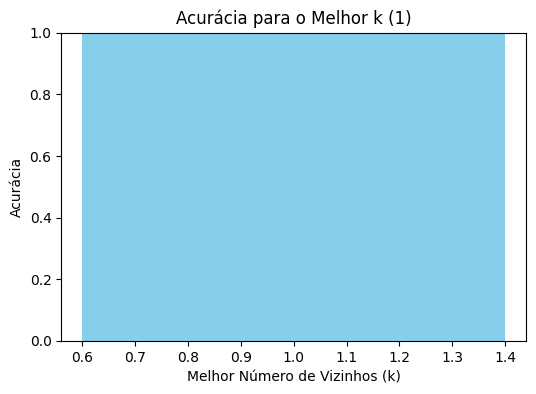

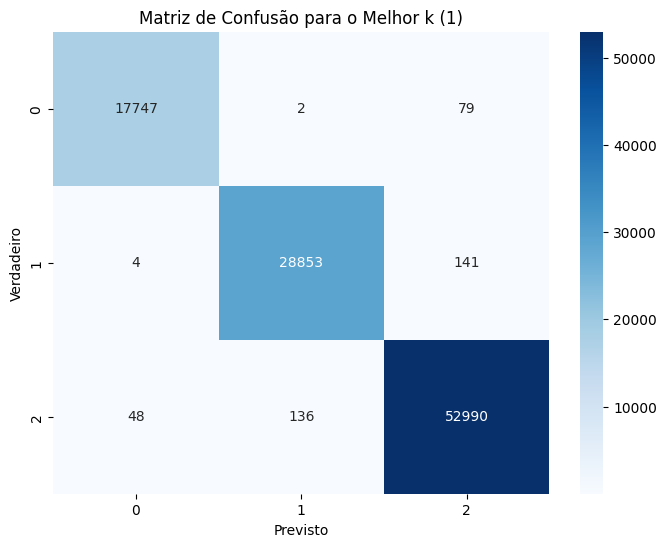

In [2]:
X_treino = df_treinamento.drop(columns=['Credit_Score'])
y_treino = df_treinamento['Credit_Score']

# Transformação do alvo para valores numéricos
label_encoder = LabelEncoder()
y_treino = label_encoder.fit_transform(y_treino)

# Lista para armazenar os resultados
results = []

for k in range(1, 20, 1):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_treino, y_treino)
    
    y_pred_treino = knn.predict(X_treino)
    accuracy = accuracy_score(y_treino, y_pred_treino)
    conf_matrix = confusion_matrix(y_treino, y_pred_treino)

    results.append({
        'k': k,
        'Acurácia': accuracy,
        'Matriz de Confusão': conf_matrix
    })

results_df = pd.DataFrame(results)

melhor_k_index = results_df['Acurácia'].idxmax()
melhor_k = results_df.loc[melhor_k_index, 'k']
melhor_acuracia = results_df.loc[melhor_k_index, 'Acurácia']
melhor_matriz_confusao = results_df.loc[melhor_k_index, 'Matriz de Confusão']

print(f"Melhor valor de k: {melhor_k}")
print(f"Acurácia com k = {melhor_k}: {melhor_acuracia:.4f}")
print("Matriz de Confusão para o melhor k:")
classes = label_encoder.classes_  # Recupera os nomes das classes originais
conf_matrix_df = pd.DataFrame(melhor_matriz_confusao, index=classes, columns=classes)
print(conf_matrix_df)

taxa_acerto = {}
for i, classe in enumerate(classes):
    taxa_acerto[classe] = melhor_matriz_confusao[i, i] / melhor_matriz_confusao[i].sum()
    print(f"Taxa de acerto para {classe}: {taxa_acerto[classe]:.4f}")


# Gráfico de Acurácia
plt.figure(figsize=(6, 4))
plt.bar([melhor_k], [melhor_acuracia], color='skyblue')
plt.xlabel('Melhor Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title(f'Acurácia para o Melhor k ({melhor_k})')
plt.ylim(0, 1)
plt.show()

# Heatmap da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(melhor_matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title(f'Matriz de Confusão para o Melhor k ({melhor_k})')
plt.show()

#### Distância Minkowski

Melhor valor de k: 1
Acurácia com k = 1: 0.9959
Matriz de Confusão para o melhor k:
           Good   Poor  Standard
Good      17747      2        79
Poor          4  28853       141
Standard     48    136     52990
Taxa de acerto para Good: 0.9955
Taxa de acerto para Poor: 0.9950
Taxa de acerto para Standard: 0.9965


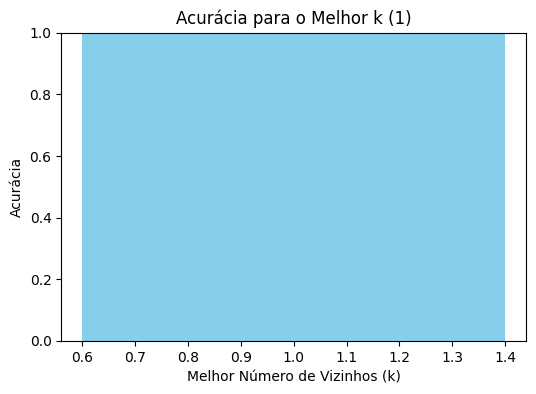

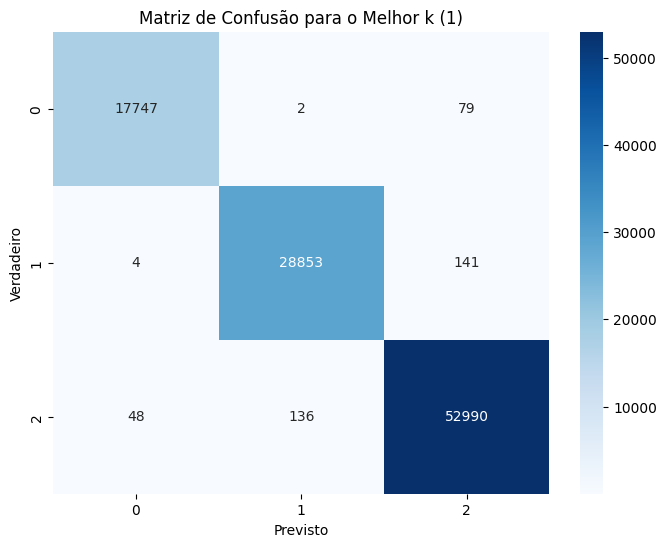

In [3]:
X_treino = df_treinamento.drop(columns=['Credit_Score'])
y_treino = df_treinamento['Credit_Score']

# Transformação do alvo para valores numéricos
label_encoder = LabelEncoder()
y_treino = label_encoder.fit_transform(y_treino)

# Lista para armazenar os resultados
results = []

for k in range(1, 20, 1):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_treino, y_treino)
    
    y_pred_treino = knn.predict(X_treino)
    accuracy = accuracy_score(y_treino, y_pred_treino)
    conf_matrix = confusion_matrix(y_treino, y_pred_treino)

    results.append({
        'k': k,
        'Acurácia': accuracy,
        'Matriz de Confusão': conf_matrix
    })

results_df = pd.DataFrame(results)

melhor_k_index = results_df['Acurácia'].idxmax()
melhor_k = results_df.loc[melhor_k_index, 'k']
melhor_acuracia = results_df.loc[melhor_k_index, 'Acurácia']
melhor_matriz_confusao = results_df.loc[melhor_k_index, 'Matriz de Confusão']

print(f"Melhor valor de k: {melhor_k}")
print(f"Acurácia com k = {melhor_k}: {melhor_acuracia:.4f}")
print("Matriz de Confusão para o melhor k:")
classes = label_encoder.classes_  # Recupera os nomes das classes originais
conf_matrix_df = pd.DataFrame(melhor_matriz_confusao, index=classes, columns=classes)
print(conf_matrix_df)

taxa_acerto = {}
for i, classe in enumerate(classes):
    taxa_acerto[classe] = melhor_matriz_confusao[i, i] / melhor_matriz_confusao[i].sum()
    print(f"Taxa de acerto para {classe}: {taxa_acerto[classe]:.4f}")


# Gráfico de Acurácia
plt.figure(figsize=(6, 4))
plt.bar([melhor_k], [melhor_acuracia], color='skyblue')
plt.xlabel('Melhor Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title(f'Acurácia para o Melhor k ({melhor_k})')
plt.ylim(0, 1)
plt.show()

# Heatmap da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(melhor_matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title(f'Matriz de Confusão para o Melhor k ({melhor_k})')
plt.show()

#### Distância Chebyshev

Melhor valor de k: 1
Acurácia com k = 1: 0.9959
Matriz de Confusão para o melhor k:
           Good   Poor  Standard
Good      17747      2        79
Poor          4  28853       141
Standard     48    136     52990
Taxa de acerto para Good: 0.9955
Taxa de acerto para Poor: 0.9950
Taxa de acerto para Standard: 0.9965


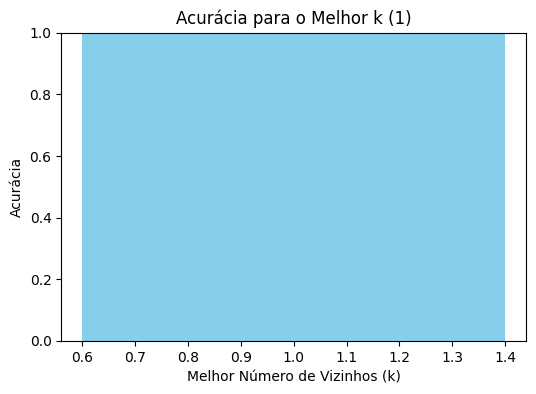

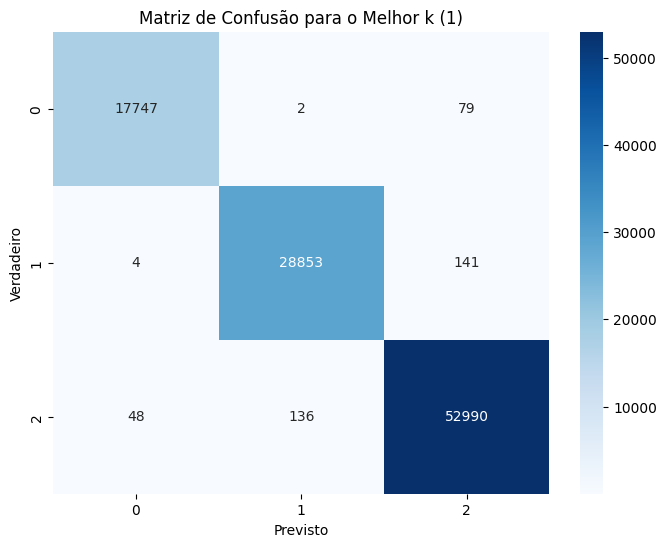

In [4]:
X_treino = df_treinamento.drop(columns=['Credit_Score'])
y_treino = df_treinamento['Credit_Score']

# Transformação do alvo para valores numéricos
label_encoder = LabelEncoder()
y_treino = label_encoder.fit_transform(y_treino)

# Lista para armazenar os resultados
results = []

for k in range(1, 20, 1):
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_treino, y_treino)
    
    y_pred_treino = knn.predict(X_treino)
    accuracy = accuracy_score(y_treino, y_pred_treino)
    conf_matrix = confusion_matrix(y_treino, y_pred_treino)

    results.append({
        'k': k,
        'Acurácia': accuracy,
        'Matriz de Confusão': conf_matrix
    })

results_df = pd.DataFrame(results)

melhor_k_index = results_df['Acurácia'].idxmax()
melhor_k = results_df.loc[melhor_k_index, 'k']
melhor_acuracia = results_df.loc[melhor_k_index, 'Acurácia']
melhor_matriz_confusao = results_df.loc[melhor_k_index, 'Matriz de Confusão']

print(f"Melhor valor de k: {melhor_k}")
print(f"Acurácia com k = {melhor_k}: {melhor_acuracia:.4f}")
print("Matriz de Confusão para o melhor k:")
classes = label_encoder.classes_  # Recupera os nomes das classes originais
conf_matrix_df = pd.DataFrame(melhor_matriz_confusao, index=classes, columns=classes)
print(conf_matrix_df)

taxa_acerto = {}
for i, classe in enumerate(classes):
    taxa_acerto[classe] = melhor_matriz_confusao[i, i] / melhor_matriz_confusao[i].sum()
    print(f"Taxa de acerto para {classe}: {taxa_acerto[classe]:.4f}")


# Gráfico de Acurácia
plt.figure(figsize=(6, 4))
plt.bar([melhor_k], [melhor_acuracia], color='skyblue')
plt.xlabel('Melhor Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title(f'Acurácia para o Melhor k ({melhor_k})')
plt.ylim(0, 1)
plt.show()

# Heatmap da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(melhor_matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title(f'Matriz de Confusão para o Melhor k ({melhor_k})')
plt.show()

### Distância Coseno

Melhor valor de k: 1
Acurácia com k = 1: 0.9959
Matriz de Confusão para o melhor k:
           Good   Poor  Standard
Good      17752      3        73
Poor          3  28847       148
Standard     54    133     52987
Taxa de acerto para Good: 0.9957
Taxa de acerto para Poor: 0.9948
Taxa de acerto para Standard: 0.9965


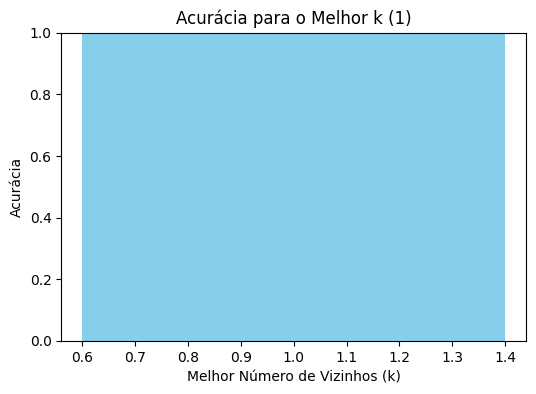

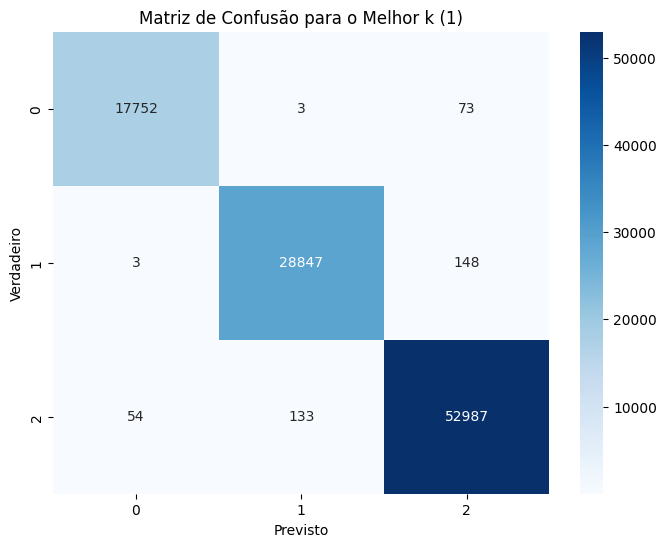

In [5]:
X_treino = df_treinamento.drop(columns=['Credit_Score'])
y_treino = df_treinamento['Credit_Score']

# Transformação do alvo para valores numéricos
label_encoder = LabelEncoder()
y_treino = label_encoder.fit_transform(y_treino)

# Lista para armazenar os resultados
results = []

for k in range(1, 20, 1):
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_treino, y_treino)
    
    y_pred_treino = knn.predict(X_treino)
    accuracy = accuracy_score(y_treino, y_pred_treino)
    conf_matrix = confusion_matrix(y_treino, y_pred_treino)

    results.append({
        'k': k,
        'Acurácia': accuracy,
        'Matriz de Confusão': conf_matrix
    })

results_df = pd.DataFrame(results)

melhor_k_index = results_df['Acurácia'].idxmax()
melhor_k = results_df.loc[melhor_k_index, 'k']
melhor_acuracia = results_df.loc[melhor_k_index, 'Acurácia']
melhor_matriz_confusao = results_df.loc[melhor_k_index, 'Matriz de Confusão']

print(f"Melhor valor de k: {melhor_k}")
print(f"Acurácia com k = {melhor_k}: {melhor_acuracia:.4f}")
print("Matriz de Confusão para o melhor k:")
classes = label_encoder.classes_  # Recupera os nomes das classes originais
conf_matrix_df = pd.DataFrame(melhor_matriz_confusao, index=classes, columns=classes)
print(conf_matrix_df)

taxa_acerto = {}
for i, classe in enumerate(classes):
    taxa_acerto[classe] = melhor_matriz_confusao[i, i] / melhor_matriz_confusao[i].sum()
    print(f"Taxa de acerto para {classe}: {taxa_acerto[classe]:.4f}")


# Gráfico de Acurácia
plt.figure(figsize=(6, 4))
plt.bar([melhor_k], [melhor_acuracia], color='skyblue')
plt.xlabel('Melhor Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title(f'Acurácia para o Melhor k ({melhor_k})')
plt.ylim(0, 1)
plt.show()

# Heatmap da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(melhor_matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title(f'Matriz de Confusão para o Melhor k ({melhor_k})')
plt.show()